# TIME EVOLUTION ANALYSIS

In [ ]:
import numpy as np

from qho_time_evolution import Param, Operators
import plot

In [2]:
# SIMULATION PARAMETERS

xmin = -20.0
xmax = 20.0
num_x = 40000
tsim = 10
tc = 10
desired_dt = 0.1
num_t = int(tsim/desired_dt)
num_tc = int(tc/desired_dt)
im_time = False

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS -> ADD WFC OFFSET

res = num_x
omega = 1
num_wfcs = 8
T = 1
linear_pulse = lambda t: t/tsim
times = np.linspace(0, tsim, num_t)
pulse = linear_pulse(times)

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [3]:
opr.rho

array([[6.323e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 2.326e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 8.560e-02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 3.150e-02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.160e-02, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.300e-03,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.600e-03, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.000e-04]])

In [4]:
print("Energies\n", opr.energies)

Energies
 [0.499999999999997, 1.4999999999999951, 2.4999999999999862, 3.4999999999999707, 4.49999999999999, 5.49999999999999, 6.499999999999963, 7.49999999999995]


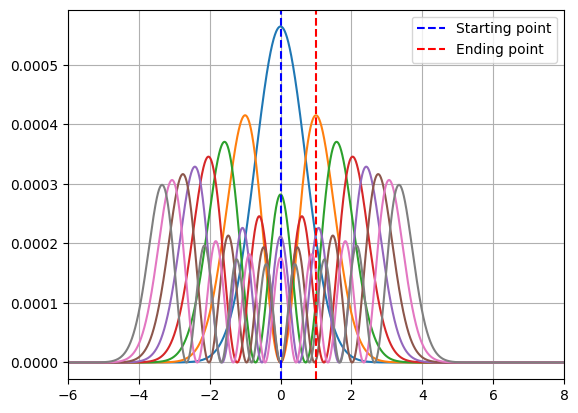

In [5]:
plot.plot_wavefunctions(par, opr)

In [6]:
opr.infidelity()

1e-10

In [7]:
opr.time_evolution(par, fixed_potential=False, compute_statistics=True)

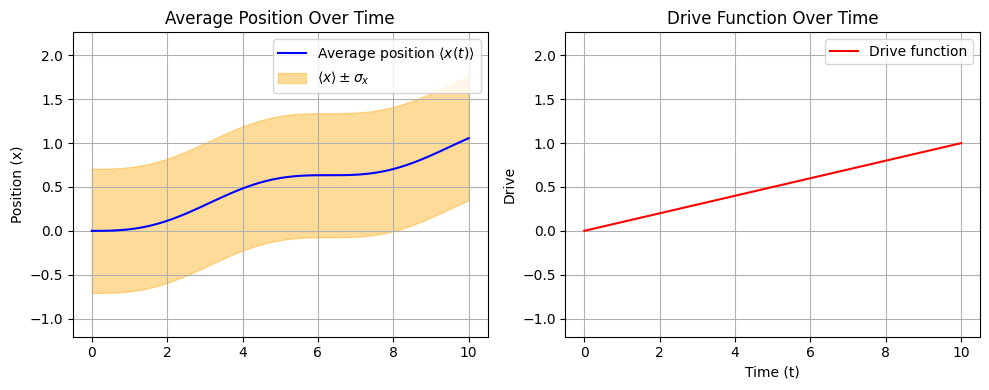

In [8]:
plot.plot_position_statistics(par, opr, 0)

In [9]:
print("Energies\n", opr.energies)

Energies
 [0.5192123958907673, 1.5192133350331511, 2.5192142741755355, 3.5192152133179455, 4.519216152460319, 5.519217091602674, 6.519218030745099, 7.519218969887503]


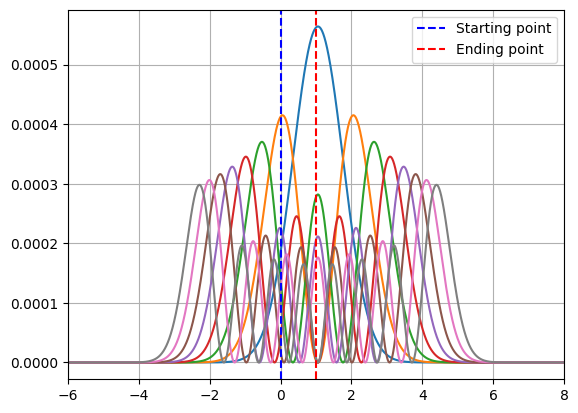

In [10]:
plot.plot_wavefunctions(par, opr)

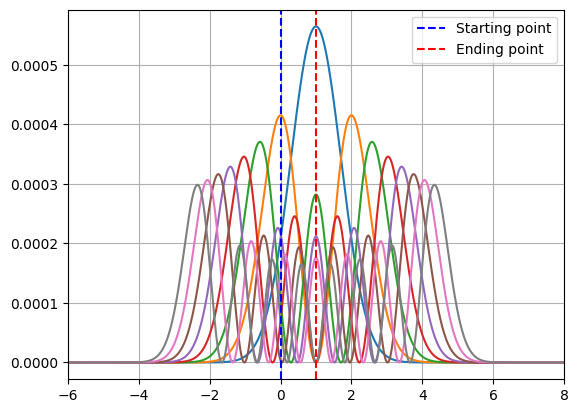

In [11]:
plot.plot_wavefunctions(par, opr, shifted = True)

In [12]:
opr.infidelity()

0.008697922121189871636

In [13]:
opr.time_evolution(par, fixed_potential=True, compute_statistics=True)

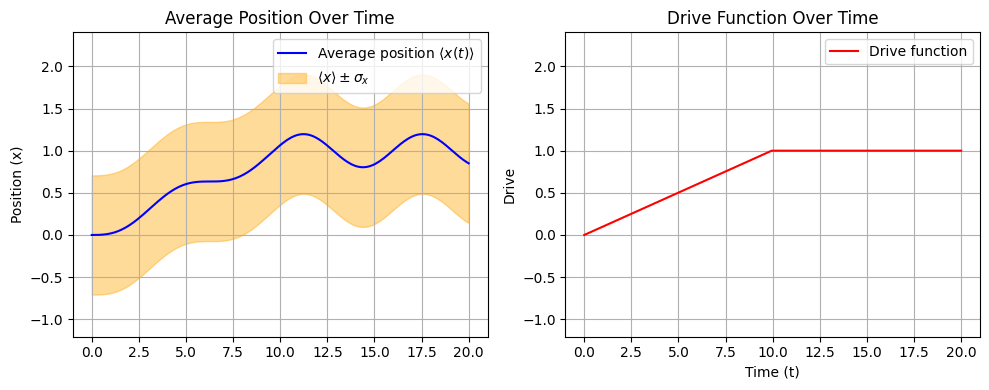

In [14]:
plot.plot_position_statistics(par, opr, 0)

In [15]:
opr.rho

array([[ 6.248e-01+0.j    , -1.560e-02-0.0525j, -2.500e-03+0.002j ,
         2.000e-04+0.j    ,  0.000e+00-0.j    ,  0.000e+00-0.j    ,
         0.000e+00+0.j    , -0.000e+00+0.j    ],
       [-1.560e-02+0.0525j,  2.346e-01+0.j    , -8.200e-03-0.0276j,
        -1.600e-03+0.0013j,  1.000e-04+0.j    , -0.000e+00+0.j    ,
         0.000e+00-0.j    ,  0.000e+00+0.j    ],
       [-2.500e-03-0.002j , -8.200e-03+0.0276j,  8.810e-02+0.j    ,
        -3.800e-03-0.0125j, -8.000e-04+0.0007j,  1.000e-04+0.j    ,
         0.000e+00-0.j    ,  0.000e+00-0.j    ],
       [ 2.000e-04-0.j    , -1.600e-03-0.0013j, -3.800e-03+0.0125j,
         3.310e-02+0.j    , -1.600e-03-0.0054j, -4.000e-04+0.0003j,
         0.000e+00+0.j    , -0.000e+00-0.j    ],
       [ 0.000e+00+0.j    ,  1.000e-04-0.j    , -8.000e-04-0.0007j,
        -1.600e-03+0.0054j,  1.240e-02+0.j    , -7.000e-04-0.0022j,
        -2.000e-04+0.0001j,  0.000e+00+0.j    ],
       [ 0.000e+00+0.j    , -0.000e+00-0.j    ,  1.000e-04-0.j    ,
       

In [16]:
print("Energies\n", opr.energies)

Energies
 [0.5192373935131591, 1.5192400239598718, 2.519242654406603, 3.519245284853375, 4.519247915300128, 5.519250545746839, 6.519253176193619, 7.519255806640324]


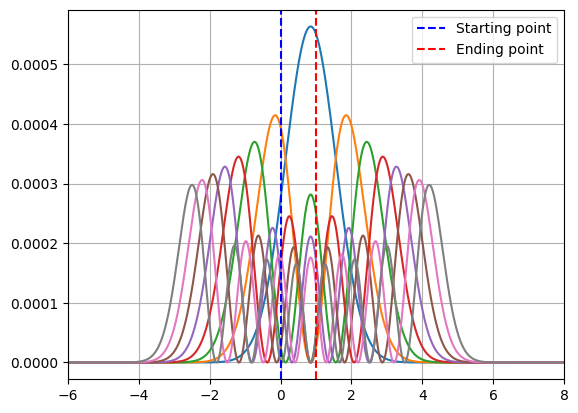

In [17]:
plot.plot_wavefunctions(par, opr)

In [18]:
opr.infidelity()

0.008709464073709184955

In [19]:
opr.average_infidelity

0.008749245042840786355

# TEMPERATURE ANALYSIS

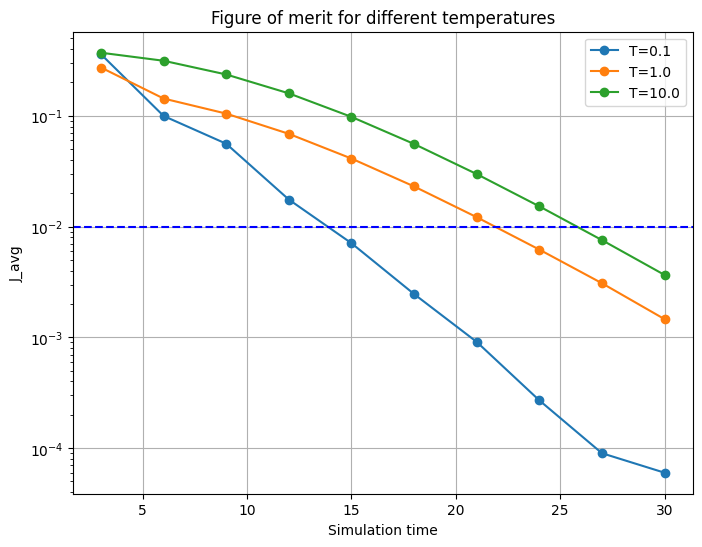

In [20]:
data = plot.load_data_temp("temperature.txt")
plot.plot_data_temp(data)

# TESTING THE PULSE

In [35]:
from optimization import load_fom, load_best_results

timestamp = "20250306_142317"

fomlist = load_fom(timestamp)
timegrid, pulse = load_best_results(timestamp)

Files inside the archive: ['Pulse_1.npy', 'time_grid_for_Pulse_1.npy', 'pulse_names.npy', 'parameter_names.npy', 'time_names.npy', 'FoM.npy', 'iteration_number.npy', 'super_it.npy', 'status_code.npy']


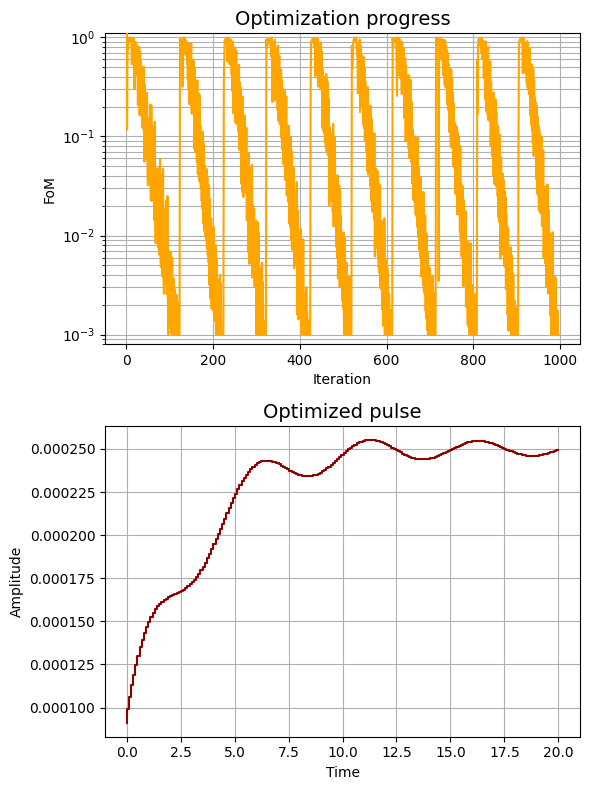

In [36]:
plot.plot_optimization_process(fomlist, timegrid, pulse)

In [37]:
# SIMULATION PARAMETERS

xmin = -20.0
xmax = 20.0
num_x = 4000
tsim = 20
tc = 10
desired_dt = 0.1
num_t = int(tsim/desired_dt)
num_tc = int(tc/desired_dt)
im_time = False

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS -> ADD WFC OFFSET

res = num_x
omega = 1.0
num_wfcs = 8
T = 1

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [38]:
opr.energies

[0.5,
 1.5000000000000007,
 2.4999999999999973,
 3.4999999999999964,
 4.4999999999999885,
 5.499999999999995,
 6.499999999999993,
 7.499999999999993]

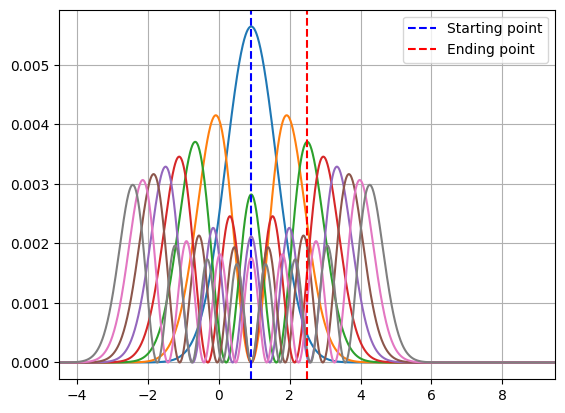

In [39]:
plot.plot_wavefunctions(par, opr)

In [40]:
opr.time_evolution(par, fixed_potential=False, compute_statistics=True)

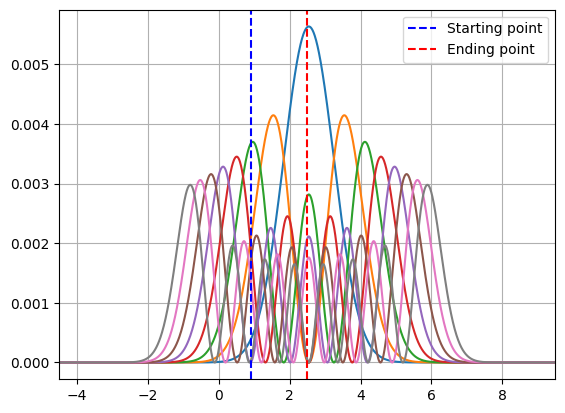

In [41]:
plot.plot_wavefunctions(par, opr)

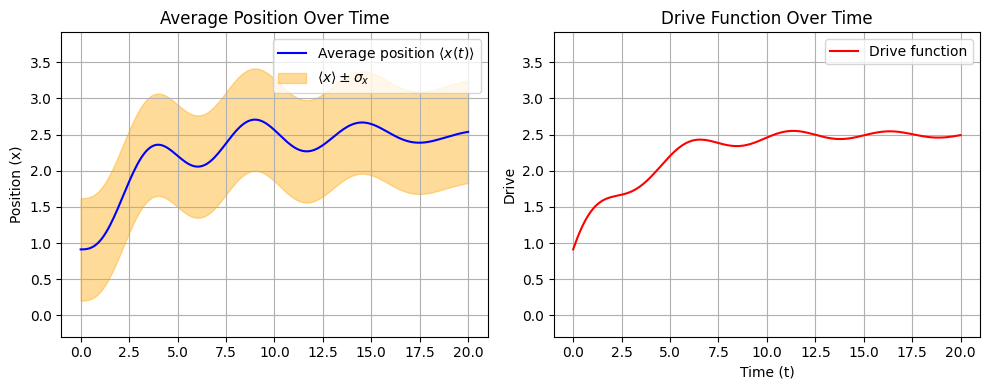

In [42]:
plot.plot_position_statistics(par, opr, 0)

In [43]:
opr.energies

[0.50200646747241,
 1.5020090979191556,
 2.502011728365894,
 3.5020143588126182,
 4.502016989259381,
 5.502019619706099,
 6.5020222501528275,
 7.502024880599575]

In [44]:
opr.time_evolution(par, fixed_potential=True, compute_statistics=True)

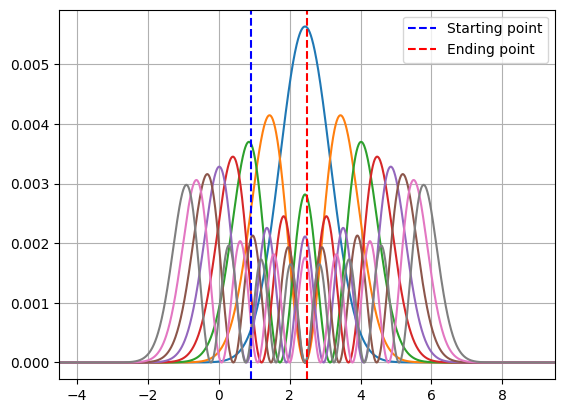

In [45]:
plot.plot_wavefunctions(par, opr)

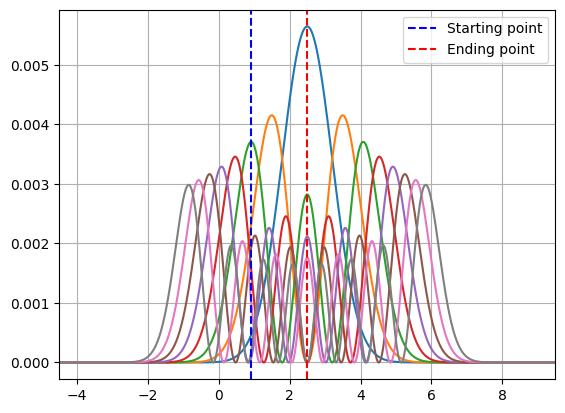

In [46]:
plot.plot_wavefunctions(par, opr, shifted=True)

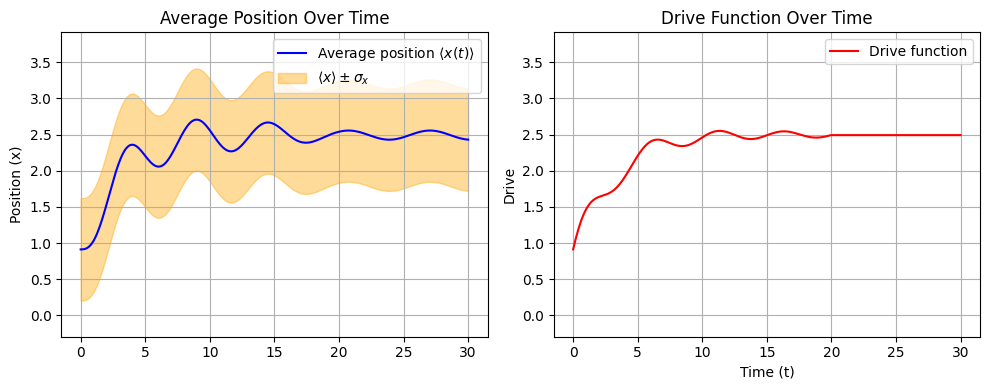

In [47]:
plot.plot_position_statistics(par, opr, 0)

In [48]:
opr.energies

[0.5020089475989522,
 1.5020119934740406,
 2.502015039349103,
 3.502018085224178,
 4.502021131099278,
 5.502024176974326,
 6.502027222849419,
 7.502030268724496]